# 📘 K-Nearest Neighbors (KNN) — Classifier

## 🌍 Concept
KNN is a **lazy learning** algorithm — it doesn't “train” a model in the usual sense.  
Instead, when you ask it to predict, it literally:
1. Looks at the *K* closest points to the new sample.
2. Checks their labels.
3. Takes the **majority vote** for classification (or average for regression).

So basically — “show me your 5 closest friends and I’ll tell you who you are.” 💀

---

## 🧩 Key Terms

| Term | Meaning |
|------|----------|
| `K` | Number of neighbors considered for voting. |
| `Distance metric` | How closeness is measured (default: Euclidean distance). |
| `Scaling` | KNN is distance-based, so features must be scaled (`StandardScaler`). |
| `weights` | `'uniform'` (all neighbors equal) or `'distance'` (closer = higher weight). |

---

## ⚙️ Steps to Build a KNN Model

1. Import and preprocess data  
2. Split into train/test  
3. Scale features  
4. Train KNN with chosen `n_neighbors`  
5. Evaluate using metrics like accuracy, recall, f1-score  

---

## Example :-

<img src="../images/KNN-lassifier.webp">

👆 Here, the new point is classified as Category 2 because most of its closest neighbors are blue squares.

KNN assigns the category based on the majority of nearby points. The image shows how KNN predicts the category of a new data point based on its closest neighbours.

- The red diamonds represent Category 1 and the blue squares represent Category 2.
- The new data point checks its closest neighbors (circled points).
- Since the majority of its closest neighbors are blue squares (Category 2) KNN predicts the new data point belongs to Category 2.

---

## What is 'K' in K Nearest Neighbour?

In the k-Nearest Neighbours algorithm k is just a number that tells the algorithm how many nearby points or neighbors to look at when it makes a decision.

Example: Imagine you're deciding which fruit it is based on its shape and size. You compare it to fruits you already know.

- If k = 3, the algorithm looks at the 3 closest fruits to the new one.
- If 2 of those 3 fruits are apples and 1 is a banana, the algorithm says the new fruit is an apple because most of its neighbors are apples.


---

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../datasets/loan_approval_data.csv")

X = df.drop("Approved", axis=1)
y = df["Approved"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [5]:
# Initializing KNN
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [6]:
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report :\n", cr)

Accuracy: 0.61

Classification Report :
               precision    recall  f1-score   support

           0       0.58      0.61      0.59        94
           1       0.64      0.61      0.62       106

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200



## Tuning 'k' Hyperparameter

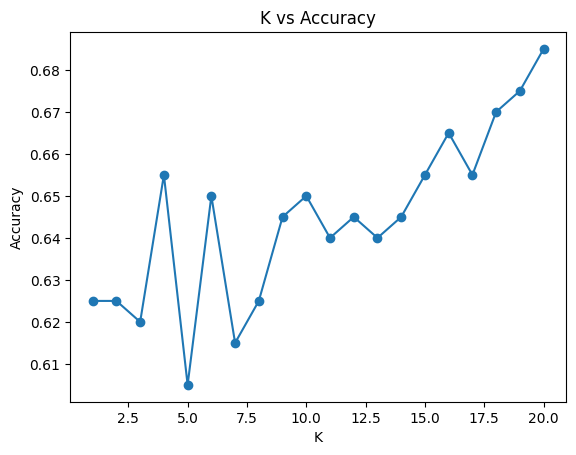

In [7]:
scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), scores, marker="o")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()

In [8]:
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report :\n", cr)

Accuracy: 0.685

Classification Report :
               precision    recall  f1-score   support

           0       0.66      0.69      0.67        94
           1       0.71      0.68      0.70       106

    accuracy                           0.69       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.69      0.69      0.69       200

